# Лабораторная работа № 3
### Минимальная оценка - 3 балла
### Максимальная оценка - 5 балла
Цель работы: реализация алгоритмов машинного обучения, основанных на решающих деревьях.

Для успешной сдачи лабораторной работы Вам необходимо предоставить заполненый исходный ноутбук, продемострировать процесс выполнения работы и ответить на дополнительные вопросы преподавателя.

### Описание датасета

Данный датасет посвящён определению типа опухоли (доброкачественная или злокачественная).
- id - идентификатор пользователя
- diagnosis - диагноз (M = malignant (злокачественная опухоль), B = benign (доброкачественная)) - является меткой класса (далее целевая переменная)
- столбцы 3-33 - параметры опухоли.

## Задание 1 (3 балла)

### Задание 1.1
Загрузите датасет $breast\_cancer\_wisconsin\_data.csv$, выполните его предобработку, разделите на обучающую и тестовую выборки (в
соотношении 7:3) и выделите целевую переменную.

*Подсказка: некоторые неинформативные поля можно удалить.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('breast_cancer_wisconsin_data.csv').drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Попробуемы выделить информативные переменные, построив гистограммы распределений фичей в условиях равенства таргета разным значениям

In [6]:
df_M = df[df['diagnosis'] == 'M'].drop('diagnosis', axis=1)
df_B = df[df['diagnosis'] == 'B'].drop('diagnosis', axis=1)

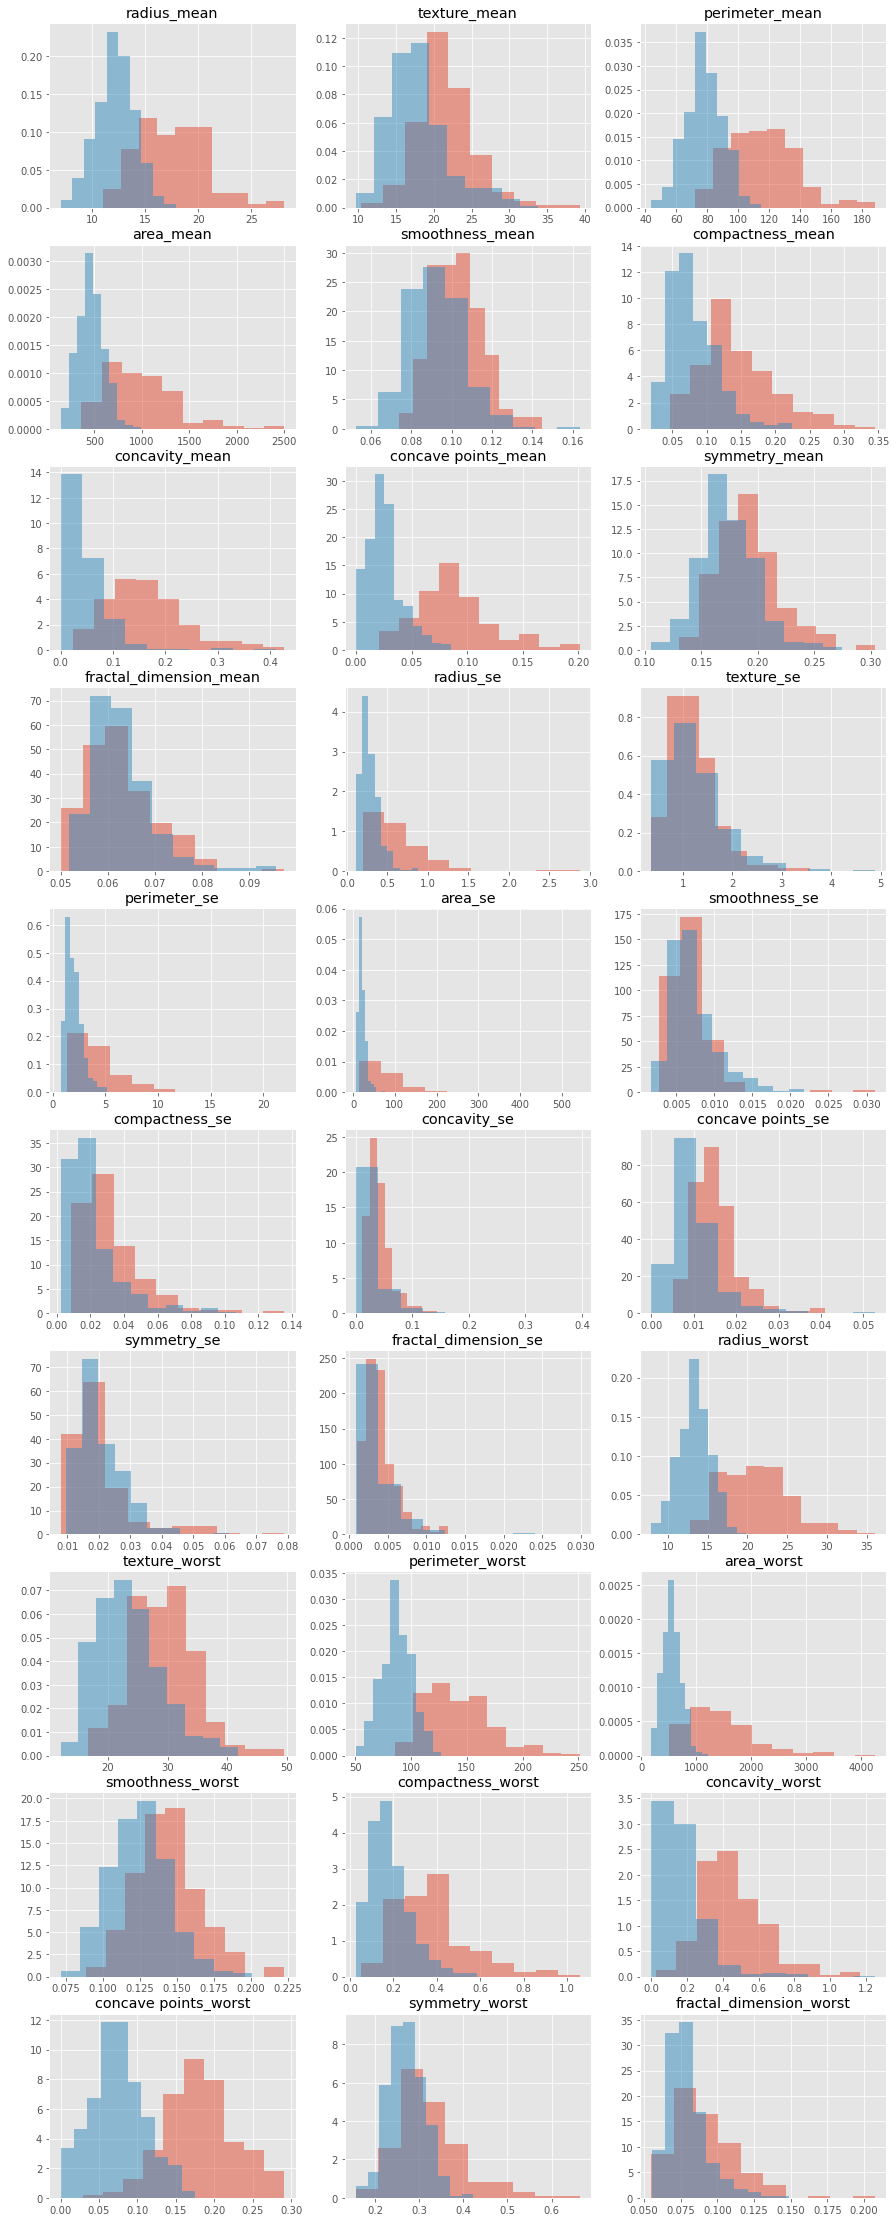

In [7]:
_, ax = plt.subplots(10, 3, figsize=(15, 40))

#
# Строю распределения фичей
#

for i in range(df_M.shape[1]):
    ax_i = i // 3
    ax_j = i % 3
    
    #
    # Заголовок подпишу
    #
    
    column = df_M.columns[i]
    ax[ax_i][ax_j].set_title(column)
    
    #
    # А теперь сами распределения
    #
    
    ax[ax_i][ax_j].hist(df_M[column].values, alpha=0.5, density=True)
    ax[ax_i][ax_j].hist(df_B[column].values, alpha=0.5, density=True)

Можно заметить, что столбики `texture_mean`, `smoothness_mean`, `symmetry_mean`, `fractal_dimension_mean`, `texture_se`, `smoothness_se`, `compactness_se`, `concavity_se`, `concave points_se`, `symmetry_se`, `fractal_dimension_se`, `smoothness_worst`, `fractal_dimension_worst` имеют почти одинаковые распределения для разных классов. Поэтому можно их и исключить.

In [8]:
df.drop(['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 
         'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
         'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'fractal_dimension_worst'], 
        axis=1, 
        inplace=True)

df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654,0.4601
1,M,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416,0.1860,0.2750
2,M,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504,0.2430,0.3613
3,M,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869,0.2575,0.6638
4,M,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000,0.1625,0.2364


In [9]:
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=42)  # Можно не использовать

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 17), (171, 17), (398,), (171,))

### Задание 1.2
Создайте свой экземпляр [решающего дерева](https://scikit-learn.org/0.20/modules/generated/sklearn.tree.DecisionTreeClassifier.html), обучите его (пользуясь методом [fit()](https://scikit-learn.org/0.20/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)) и сохраните предсказания в переменную $predict\_y$ (метод [predict()](https://scikit-learn.org/0.20/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict))

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay)

In [13]:
# Выборка не очень сбалансирована
m_count = len(y_train[y_train == 'M'])
b_count = len(y_train[y_train == 'B'])
m_count, b_count

(149, 249)

In [14]:
wm = len(y_train) / m_count
wb = len(y_train) / b_count

In [15]:
# Зададим веса для классов обратно пропорциональные их доле
class_weight = {
    'M': wm / (wm + wb), 
    'B': wb / (wm + wb),
}

assert sum(class_weight.values()) == 1

In [16]:
model = DecisionTreeClassifier(max_depth=8,                # Ограничим высоту дерева (сложное оно нам не нужно)
                               class_weight=class_weight)  # Передадим веса

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'B': 0.3743718592964824,
                                     'M': 0.6256281407035176},
                       max_depth=8)

In [18]:
y_pred = model.predict(X_test)

Построим матрицу неточностей, чтобы увидеть долю ложно-положительных и ложно-отрицательных ответов.

Ну она красивая :)

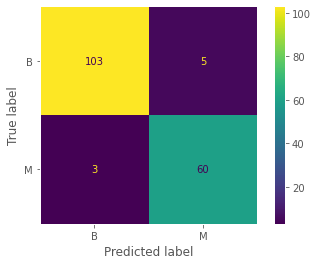

In [19]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.grid()

### Задание 1.3
Реализуйте любые 2 метрики оценки качества классификации и, используя их, сравните Ваши предсказания($predict\_y$) с тестовой целевой переменной.
Результат выведете в отдельной ячейке в формате 'metric_name : score'. Например: $$accuracy: 0.756$$

Подсказка: про метрики качества классификации можно прочитать [тут](https://habr.com/ru/company/ods/blog/328372/). 

In [20]:
def recall_score(y_true, y_pred, *, label=1):
    P  = sum([t == label for t in y_true])
    TP = sum([t == p for t, p in zip(y_true, y_pred) if t == label])
    
    return TP / P

In [21]:
def precision_score(y_true, y_pred, *, label=1):
    TP = sum([t == p for t, p in zip(y_true, y_pred) if t == label])
    FP = sum([t != p for t, p in zip(y_true, y_pred) if t != label])
    
    return TP / (TP + FP)

In [22]:
recall = recall_score(y_test.values, y_pred, label='M')
precision = precision_score(y_test.values, y_pred, label='M')

In [23]:
print(f'{recall    = }\n{precision = }')

recall    = 0.9523809523809523
precision = 0.9230769230769231


### Задание 1.4
Реализуйте функцию, которая из исходного датасета (после вашей предобрадотки) формирует новый, путём случайного выбора $m < M$ столбцов и $n < N$ строк (где $M$ и $N$ - число столбцов и строк в исходном датасете). Значения $m$ и $n$ являются аргументами функции. Результат работы функции продемострируйте на исходном датасете с $n=2$ и $m=2$.

Например. Пусть исходный датасет имеет 4 столбца (**A,B,C,D**) и 5 строк. Тогда результат работы Вашей функции при $m=2$ (случайно выбрались 2 столбца: **A,C** ) и $n=3$ (случайно выбрались 3 строчки: 1,3,5) должен быть следующим:
![](https://pp.userapi.com/c849424/v849424121/144e71/E-uOYJylgIs.jpg)

Для многократного использования функции постарайтесь не удалять строки и столбцы из исходного датасета.

In [24]:
def rand_func(dataset_A: pd.DataFrame, m: int, n: int, random_state: int = 42) -> pd.DataFrame:
    if m >= dataset_A.shape[1]:
        raise ValueError(f'm must be strictly less than M. Now {m = }, M = {dataset_A.shape[1]}')
        
    if n >= dataset_A.shape[0]:
        raise ValueError(f'm must be strictly less than M. Now {n = }, N = {dataset_A.shape[0]}')
    
    #
    # Сначала выберу строчки
    #
    
    dataset_B = dataset_A.sample(n, random_state=random_state)
    
    #
    # А теперь - столбики
    #
    
    return dataset_B.sample(m, random_state=random_state, axis=1)

In [25]:
test_df = pd.DataFrame({
    'A': [1, 5,  9, 13, 17],
    'B': [2, 6, 10, 14, 18],
    'C': [3, 7, 11, 15, 19],
    'D': [4, 8, 12, 16, 20],
})

test_df

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
4,17,18,19,20


In [26]:
rand_func(test_df, 2, 3)

,B,D
1,6,8
4,18,20
2,10,12


### Задание 1.5
Реализуйте свой класс композиции решающих деревьев (ансамбля решающих деревьев) с параметрами:
- base_model_class - класс базовой модели
- n_base_models - количество решающих деревьев в ансамбле
- n_features - аналог параметра $m$ в функции **rand_func** из задания 1.4
- n_samples - аналог параметра $n$ в функции **rand_func** из задания 1.4

Для реализации необходимо дописать методы $train$ и $predict$.

В методе $train$ необходимо обучить все *self.n_base_models* базовых моделей, хранящихся в массиве *self.base_models*, на **разных** подвыборках размером $n х m$, где $m=\sqrt{M}$, $n=\sqrt{N}$ *(для получения разных подвыборок можно использовать функцию rand_func из задания 1.4 с параметрами $m=\sqrt{M}$, $n=\sqrt{N}$ и разными значениями $random\_state$)*
$$random\_state=k*all*(i+1)$$где $k$- Ваш номер в списке группы, $all$-количество человек в Вашей группе, $i$-номер базовой модели в массиве *self.base_models*

В методе $predict$ необходимо получить предсказания каждой базовой модели на тестовой выборке и объединить результаты с помощью простого голосования.

Например:
Если большинство решающих деревьев (predict_tree_ ) отнесло строку к классу 1, то ответ ансабля (predict_ensemble) должен быть равен 1.

![](https://pp.userapi.com/c849424/v849424121/144f8c/aq28uXn5gSE.jpg)

In [27]:
class Ensemble(object):
    def __init__(self, base_model_class, n_base_models, 
                 n_features=None, n_samples=None, **base_model_params):
        self._n_base_models = n_base_models
        self._n_features    = n_features
        self._n_samples     = n_samples
        self._base_models   = [base_model_class(**base_model_params) for _ in range(n_base_models)]
        self._data_columns  = []
        
        
    def fit(self, X, y):
        """
        Train classifier by calling .fit() method of base models
        :param X: array-like features (n_obj x n_features)
        :param y: array-like targets
        """
        
        self._data_columns = []
        
        #
        # Получу количество фичей
        #
        
        train_samples, train_features = X.shape
        
        n_features = self._n_features if self._n_features is not None else int(np.ceil(np.sqrt(train_features)))
        n_samples  = self._n_samples if self._n_samples is not None else int(np.ceil(np.sqrt(train_samples)))
        
        for i, model in enumerate(self._base_models):
            #
            # Выберу рандомные фичи и объекты
            # и сохраню на будущее фичи
            #
            
            subsample_X = rand_func(X, n_features, n_samples, random_state=i)
            subsample_y = y[subsample_X.index]
            
            self._data_columns.append(subsample_X.columns)
            
            #
            # Обучу модель
            #
            
            model.fit(subsample_X, subsample_y)
        
        
    def predict(self, X):
        """
        Make prediction for X using .predict() method of base models and simple voting
        :param X: array-like features (n_obj x n_features)
        :return results: array-like target predictions (n_obj)
        """
        
        if self._data_columns == []:
            raise RuntimeError('Call fit method first')
        
        #
        # Сначала для каждой модели получу предикшны
        #
        
        predictions = np.array([model.predict(X[cols]) 
                                for cols, model in zip(self._data_columns, self._base_models)])
        
        #
        # Теперь выделю в каждом столбике самый частый и верну как результат
        #
        
        return np.array([Ensemble._get_most_frequent(predictions[:, i]) 
                         for i in range(predictions.shape[1])])
    

    @staticmethod
    def _get_most_frequent(predictions):
        values, counts = np.unique(predictions, return_counts=True)
        return values[np.argmax(counts)]

Продемонстрируйте работу ансамбля. В качестве базовой модели возьмите [DecisionTreeClassifier](https://scikit-learn.org/0.20/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

$n\_base\_models=k*all$, где $k$-ваш номер в списке группы, $all$ - количество человек в группе.

In [28]:
k, all_ = 10, 11

In [29]:
ensemble = Ensemble(base_model_class=DecisionTreeClassifier, 
                    n_base_models=k * all_,
                    max_depth=6,                # Ограничим высоту деревьев
                    class_weight=class_weight)  # Передадим веса
ensemble.fit(X_train, y_train)

In [30]:
y_pred = ensemble.predict(X_test)

### Задание 1.6
Используя реализованные в задание 1.3 метрики, сравните точность предсказания ансамбля решающих деревьев с предсказанием одного решающего дерева из задания 1.2

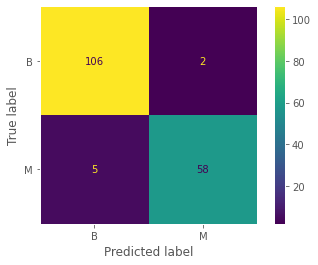

In [31]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.grid()

In [32]:
recall = recall_score(y_test.values, y_pred, label='M')
precision = precision_score(y_test.values, y_pred, label='M')

In [33]:
print(f'{recall    = }\n{precision = }')

recall    = 0.9206349206349206
precision = 0.9666666666666667


## Задание 2 (2 балла)
Пользуясь материалами лекции, реализуйте свой класс решающего дерева. Критерий ветвления выбрать самостоятельно.

In [34]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [35]:
class DecisionTree:
    def __init__(self, max_depth: int = 6, min_samples_split: int = 2):
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._root = None

    
    def fit(self, X, y):
        self._root = self._construct_tree(X, y)

    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self._root) for x in X])

    
    def _needs_stop(self, depth, n_samples, n_labels):
        max_depth_reached = depth >= self._max_depth
        min_samples_reached = n_samples < self._min_samples_split
        
        #
        # Останавливаться буду в случае достижения предельной глубины
        # или при достижении минимального числа узлов в ноде
        #
        
        return max_depth_reached or min_samples_reached or n_labels == 1

    
    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        
        #
        # Тут в простейшем виде обход деревца нашего
        #
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    
    def _information_gain(self, X, y, threshold):
        def entropy(y):
            proportions = np.bincount(y) / len(y)
            entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
            return entropy
        
        #
        # Прирост количества информации по разнице энтропии родительского узла
        # и суммарной для дочерних
        #
        
        parent_loss = entropy(y)
        left_idx, right_idx = DecisionTree._create_split(X, threshold)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * entropy(y[left_idx]) + (n_right / n) * entropy(y[right_idx])
        return parent_loss - child_loss

    
    def _best_split(self, X, y, features):
        split = {'score': -1, 
                 'feat': None, 
                 'threshold': None}

        #
        # Прохожусь по всем фичам и порогам для поиска наилучшего разбиения
        #
        
        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for threshold in thresholds:
                #
                # Посчитаю прирост количества информации
                #
                
                score = self._information_gain(X_feat, y, threshold)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['threshold'] = threshold

        return split['feat'], split['threshold']
    
    
    def _construct_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        
        #
        # А не пора ли уже остановиться?
        #
        
        if self._needs_stop(depth, n_samples, len(np.unique(y))):
            return Node(value=np.argmax(np.bincount(y)))

        #
        # Получу наилучшее разбиение и разобью по этой фиче и значению
        #
        
        rnd_feats = np.random.choice(n_features, n_features, replace=False)
        best_feat, best_threshold = self._best_split(X, y, rnd_feats)
        left_idx, right_idx = DecisionTree._create_split(X[:, best_feat], best_threshold)

        #
        # Теперь все то же самое, но для полученных разбиений
        #
        
        return Node(best_feat, 
                    best_threshold,
                    self._construct_tree(X[left_idx, :], y[left_idx], depth + 1), 
                    self._construct_tree(X[right_idx, :], y[right_idx], depth + 1))
    
    
    @staticmethod
    def _create_split(X, threshold):
        left_idx = np.argwhere(X <= threshold).flatten()
        right_idx = np.argwhere(X > threshold).flatten()
        return left_idx, right_idx

Протестирую этот класс

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator

In [37]:
class DataFrameProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self._columns = columns
        
    def fit(self, X, y=None):
        if self._columns is None:
            self._columns = X.columns
        return self
    
    def transform(self, X):
        return X[self._columns].values

In [38]:
X_processor = DataFrameProcessor()
y_processor = LabelEncoder()

In [39]:
X_train = X_processor.fit_transform(X_train)
y_train = y_processor.fit_transform(y_train)

In [40]:
X_test = X_processor.transform(X_test)

Данные для обучения преобразовали, обучу модуль

In [41]:
model = DecisionTree()
model.fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_test)

Для оценки метрик следует привести данные в изначальный формат

In [43]:
y_pred = y_processor.inverse_transform(y_pred)

In [44]:
recall = recall_score(y_test, y_pred, label='M')
precision = precision_score(y_test, y_pred, label='M')

In [45]:
print(f'{recall    = }\n{precision = }')

recall    = 0.9365079365079365
precision = 0.9365079365079365
